In [10]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize as imresize
import ScanImageTiffReader
from sklearn import decomposition
import time

%matplotlib notebook
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt, gridspec


In [2]:
dirpath = r"C:\data\2019_08 CSHL 2019\GroupDelta" #r before a string makes it a 'raw' string to handle slashes
tifpaths = [os.path.join(dirpath, f) for f in os.listdir(dirpath) if f.endswith(".tif")]
tifpaths

['C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6f_00001.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6f_00002.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6f_00003.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6s_00001.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6s_00002.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6s_00003.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\HuC-GCaMP5G_00001.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\HuC-GCaMP5G_00002.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\HuC-GCaMP5G_00003.tif']

In [3]:
tifpath = tifpaths[3]
print(tifpath)
reader = ScanImageTiffReader.ScanImageTiffReader(tifpath)
rawdata = reader.data()
metadata = reader.metadata()
reader.close()

C:\data\2019_08 CSHL 2019\GroupDelta\H2B-GCaMP6s_00001.tif


In [4]:
metadata

'SI.LINE_FORMAT_VERSION = 1\nSI.TIFF_FORMAT_VERSION = 3\nSI.VERSION_COMMIT = \'4a9264c4fccd21a03258704d0d6489537ad79e6c\'\nSI.VERSION_MAJOR = \'2018b\'\nSI.VERSION_MINOR = \'1\'\nSI.acqState = \'grab\'\nSI.acqsPerLoop = 1\nSI.extTrigEnable = false\nSI.hBeams.beamCalibratedStatus = [false false]\nSI.hBeams.directMode = [false false]\nSI.hBeams.enablePowerBox = false\nSI.hBeams.flybackBlanking = true\nSI.hBeams.interlaceDecimation = [1 1]\nSI.hBeams.interlaceOffset = [0 0]\nSI.hBeams.lengthConstants = [Inf Inf]\nSI.hBeams.powerBoxEndFrame = Inf\nSI.hBeams.powerBoxStartFrame = 1\nSI.hBeams.powerBoxes.rect = [0.25 0.25 0.5 0.5]\nSI.hBeams.powerBoxes.powers = [NaN NaN]\nSI.hBeams.powerBoxes.name = \'\'\nSI.hBeams.powerBoxes.oddLines = true\nSI.hBeams.powerBoxes.evenLines = true\nSI.hBeams.powerLimits = [100 100]\nSI.hBeams.powers = [27.1 0.1]\nSI.hBeams.pzAdjust = [false false]\nSI.hBeams.pzCustom = {[] []}\nSI.hBeams.stackEndPower = [NaN NaN]\nSI.hBeams.stackStartPower = [NaN NaN]\nSI.hBea

In [5]:
def coerce_string(string):
    if string == 'true':
        return True
    elif string == 'false':
        return False
    else:
        try:
            return int(string)
        except ValueError:
            try:
                return float(string)
            except ValueError: 
                return string

    
metadict = {line.split('=')[0].strip():coerce_string(line.split('=')[1].strip()) for line in metadata.split("\n") if line.startswith('SI')}
metadict

{'SI.LINE_FORMAT_VERSION': 1,
 'SI.TIFF_FORMAT_VERSION': 3,
 'SI.VERSION_COMMIT': "'4a9264c4fccd21a03258704d0d6489537ad79e6c'",
 'SI.VERSION_MAJOR': "'2018b'",
 'SI.VERSION_MINOR': "'1'",
 'SI.acqState': "'grab'",
 'SI.acqsPerLoop': 1,
 'SI.extTrigEnable': False,
 'SI.hBeams.beamCalibratedStatus': '[false false]',
 'SI.hBeams.directMode': '[false false]',
 'SI.hBeams.enablePowerBox': False,
 'SI.hBeams.flybackBlanking': True,
 'SI.hBeams.interlaceDecimation': '[1 1]',
 'SI.hBeams.interlaceOffset': '[0 0]',
 'SI.hBeams.lengthConstants': '[Inf Inf]',
 'SI.hBeams.powerBoxEndFrame': inf,
 'SI.hBeams.powerBoxStartFrame': 1,
 'SI.hBeams.powerBoxes.rect': '[0.25 0.25 0.5 0.5]',
 'SI.hBeams.powerBoxes.powers': '[NaN NaN]',
 'SI.hBeams.powerBoxes.name': "''",
 'SI.hBeams.powerBoxes.oddLines': True,
 'SI.hBeams.powerBoxes.evenLines': True,
 'SI.hBeams.powerLimits': '[100 100]',
 'SI.hBeams.powers': '[27.1 0.1]',
 'SI.hBeams.pzAdjust': '[false false]',
 'SI.hBeams.pzCustom': '{[] []}',
 'SI.hBeam

In [6]:
fps = metadict['SI.hRoiManager.scanFrameRate']
print(fps)

29.9642


In [7]:
rawdata.shape

(3300, 512, 512)

<IPython.core.display.Javascript object>


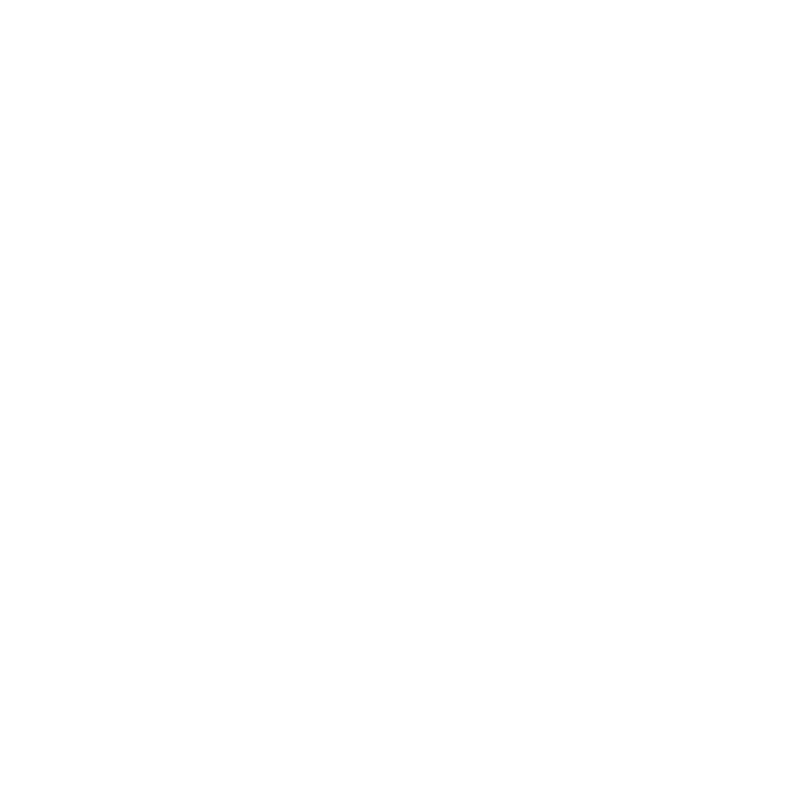

In [8]:
plt.figure(figsize=(4,4))
plt.imshow(rawdata.mean(axis=0), cmap=plt.cm.Greys_r)
# plt.savefig('test.pdf', dpi=300)

In [9]:
data = rawdata#[::2, ::2, ::2]
frametimes = np.arange(data.shape[0])/(fps)*2

In [ ]:

t0 = time.time()
timemean = data.mean(axis=(1,2))
print(time.time()-t0)
# t0 = time.time()
# timemean = data[::3, ::2, ::2].mean(axis=(1,2))
# print(time.time()-t0)
time_high = np.percentile(data, 95, axis=(1,2))
time_low = np.percentile(data, 1, axis=(1,2))

1.1379554271697998


In [ ]:
plt.figure()
plt.plot(frametimes, timemean, label = 'mean')
plt.plot(frametimes, time_high, label='95%')
plt.plot(frametimes, time_low, label='1%')
plt.legend()
plt.xlabel("Time (sec)")


In [ ]:
stim_start = 80 #seconds 

baseline = data[int(60*fps):int((70)*fps), :, :].mean(axis=0)
stim_resp = data[int(stim_start*fps):int((stim_start+2)*fps), :, :]


In [ ]:
plt.figure()
vmin, vmax = np.percentile(stim_resp.ravel(), (1, 99)) #stim_resp.min(), stim_resp.max()
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0])
plt.imshow(baseline, vmin=vmin, vmax=vmax)
plt.title('Baseline')

plt.subplot(gs[1])
plt.imshow((stim_resp.mean(axis=0)), vmin=vmin, vmax=vmax)
plt.title('Stim resp')
